In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the combined results
results_df = pd.read_csv('D:/prethesis/Imputation_MCL/results/combined_results_summary.csv')

In [4]:
# Group by dataset, missing percentage, and classifier
grouped_by_classifier = results_df.groupby(['missing_percentage', 'classifier'])['test_auc'].mean().reset_index()

# Create a new column combining missing percentage info for y-axis labels
grouped_by_classifier['dataset_label'] = grouped_by_classifier.apply(
    lambda x: f"MIMIC-III [{x['missing_percentage']} / {x['missing_percentage']}]", axis=1
)

# Sort by missing percentage for proper ordering
grouped_by_classifier = grouped_by_classifier.sort_values('missing_percentage')

In [5]:
# Group by dataset, missing percentage, and imputation method
grouped_by_imputation = results_df.groupby(['missing_percentage', 'imputation'])['test_auc'].mean().reset_index()

# Create a new column combining missing percentage info for y-axis labels
grouped_by_imputation['dataset_label'] = grouped_by_imputation.apply(
    lambda x: f"MIMIC-III [{x['missing_percentage']} / {x['missing_percentage']}]", axis=1
)

# Sort by missing percentage for proper ordering
grouped_by_imputation = grouped_by_imputation.sort_values('missing_percentage')

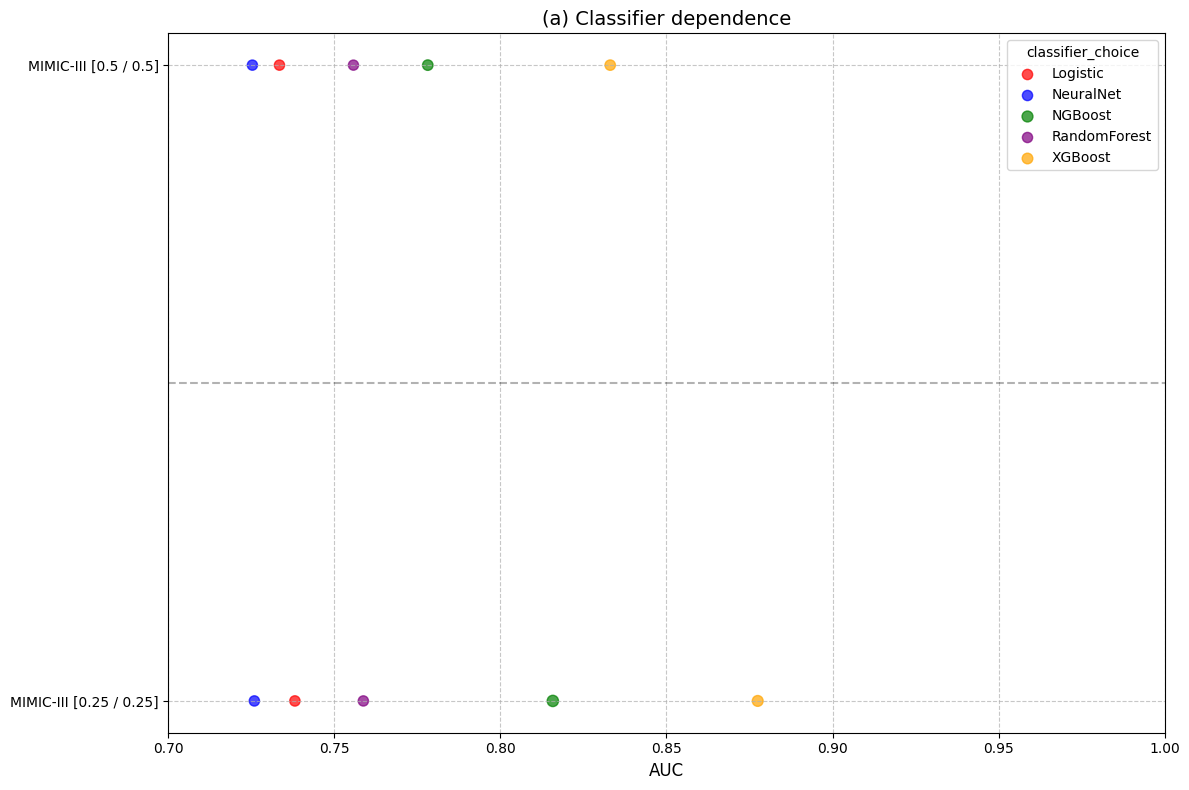

In [6]:
plt.figure(figsize=(12, 8))

# Calculate standard deviation for sizing the points
std_by_classifier = results_df.groupby(['missing_percentage', 'classifier'])['test_auc'].std().reset_index()
std_by_classifier = pd.merge(
    grouped_by_classifier, 
    std_by_classifier, 
    on=['missing_percentage', 'classifier']
)
std_by_classifier.columns = ['missing_percentage', 'classifier', 'test_auc_mean', 'dataset_label', 'test_auc_std']

# Create a custom color palette for classifiers
classifier_palette = {
    'Logistic': 'red',
    'NeuralNet': 'blue',
    'NGBoost': 'green',
    'RandomForest': 'purple',
    'XGBoost': 'orange'
}

# Create the scatter plot
for classifier, color in classifier_palette.items():
    data = std_by_classifier[std_by_classifier['classifier'] == classifier]
    plt.scatter(
        data['test_auc_mean'], 
        data['dataset_label'], 
        label=classifier,
        color=color,
        s=data['test_auc_std'] * 300 + 50,  # Scale by standard deviation
        alpha=0.7
    )

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Add title and labels
plt.title('(a) Classifier dependence', fontsize=14)
plt.xlabel('AUC', fontsize=12)
plt.xlim(0.7, 1.0)  # Adjust based on your data range

# Add a legend
plt.legend(title='classifier_choice')

# Add horizontal lines to separate different datasets
# (In your case, you only have one dataset with different missing rates)
plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig('plots/classifier_dependence_custom.png', dpi=300)

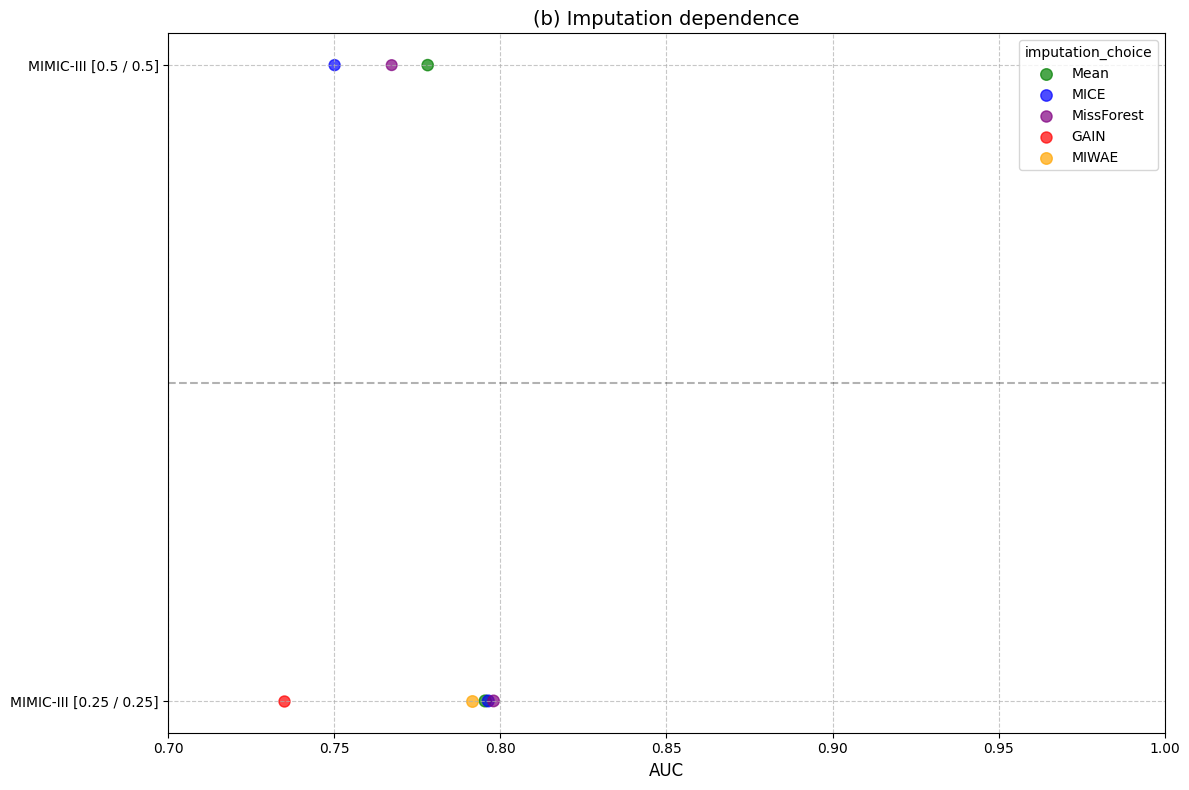

In [7]:
plt.figure(figsize=(12, 8))

# Calculate standard deviation for sizing the points
std_by_imputation = results_df.groupby(['missing_percentage', 'imputation'])['test_auc'].std().reset_index()
std_by_imputation = pd.merge(
    grouped_by_imputation, 
    std_by_imputation, 
    on=['missing_percentage', 'imputation']
)
std_by_imputation.columns = ['missing_percentage', 'imputation', 'test_auc_mean', 'dataset_label', 'test_auc_std']

# Create a custom color palette for imputation methods
imputation_palette = {
    'Mean': 'green',
    'MICE': 'blue',
    'MissForest': 'purple',
    'GAIN': 'red',
    'MIWAE': 'orange'  # Include this even if you only have partial results
}

# Create the scatter plot
for imputation, color in imputation_palette.items():
    if imputation in std_by_imputation['imputation'].unique():  # Check if method exists in results
        data = std_by_imputation[std_by_imputation['imputation'] == imputation]
        plt.scatter(
            data['test_auc_mean'], 
            data['dataset_label'], 
            label=imputation,
            color=color,
            s=data['test_auc_std'] * 300 + 50,  # Scale by standard deviation
            alpha=0.7
        )

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Add title and labels
plt.title('(b) Imputation dependence', fontsize=14)
plt.xlabel('AUC', fontsize=12)
plt.xlim(0.7, 1.0)  # Adjust based on your data range

# Add a legend
plt.legend(title='imputation_choice')

# Add horizontal lines to separate different datasets
plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig('plots/imputation_dependence_custom.png', dpi=300)